# CS 315 Project 1 Jaccard Index Analysis

Sophie Hwang, Tayae Rogers, Jenni Yu, Maya Lu-Heda, Catherine Foster, Jasmine Khuu

### 1. Extracting Data & Setting up Data Frames

In [1]:
import os, csv
import pandas as pd
import numpy as np

C:\Users\shhwa\AppData\Local\Temp\ipykernel_42516\1043464569.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
files = os.listdir("38") #input foldername
files.sort()

pairs = list(zip(files[:20], files[20:40]))
print(pairs)

[('38_Sec02Gr1Sc38Activ_CF_02-13-20-02_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr1Sc38Cntrl_CF_02-13-20-02_like_by_hashtag_data_all_videos.csv'), ('38_Sec02Gr1Sc38Activ_CF_02-13-20-07_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr1Sc38Cntrl_CF_02-13-20-08_like_by_hashtag_data_all_videos.csv'), ('38_Sec02Gr1Sc38Activ_CF_02-13-20-11_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr1Sc38Cntrl_CF_02-13-20-12_like_by_hashtag_data_all_videos.csv'), ('38_Sec02Gr1Sc38Activ_CF_02-13-20-15_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr1Sc38Cntrl_CF_02-13-20-16_like_by_hashtag_data_all_videos.csv'), ('38_Sec02Gr1Sc38Activ_CF_02-13-20-19_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr1Sc38Cntrl_CF_02-13-20-20_like_by_hashtag_data_all_videos.csv'), ('38_Sec02Gr1Sc38Activ_CF_02-13-20-23_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr1Sc38Cntrl_CF_02-13-20-23_like_by_hashtag_data_all_videos.csv'), ('38_Sec02Gr1Sc38Activ_CF_02-13-20-31_like_by_hashtag_data_all_videos.csv', '38_Sec02Gr

In [3]:
def getAllValues(fn, age, column):
    with open(f"{age}/{fn}", encoding='utf8') as fin:
        dr = csv.DictReader(fin)
        metrics = [row[column] for row in dr]
    return metrics

In [4]:
def jaccard(lst1, lst2):
    return len(set(lst1).intersection(set(lst2)))/len(set(lst1).union(set(lst2)))

In [5]:
def getHashtagValues(fn, age, column):
    hashtagList = []
    hashtags = getAllValues(fn, age, column)
    for row in hashtags:
        if len(row) != 0:
            hashtagList += row.split(', ') #split & add individual hashtags into the list
    hashtagList = np.unique(hashtagList).tolist() #eliminate duplicate hashtags
    return hashtagList

In [6]:
print((getHashtagValues(a1, 38, "hashtag")))

NameError: name 'a1' is not defined

In [7]:
scenarios = [13, 18, 23, 28, 33, 38] #age
author = pd.DataFrame()
music = pd.DataFrame()
hashtag = pd.DataFrame()

for age in scenarios:
    files = os.listdir(f"{age}")
    pairs = list(zip(files[:20], files[20:40]))
    print(age, "author")
    jaccardList = []
    for a1, c1 in pairs:
        authors1 = getAllValues(a1, age, "author")
        authors2 = getAllValues(c1, age, "author")
        jaccardList.append(jaccard(authors1, authors2))
    author[f'age_{age}'] = jaccardList
    print(age, "music")
    jaccardList = []
    for a1, c1 in pairs:
        music1 = getAllValues(a1, age, "music")
        music2 = getAllValues(c1, age, "music")
        jaccardList.append(jaccard(music1, music2))
    music[f'age_{age}'] = jaccardList
    print(age, "hashtag")
    jaccardList = []
    for a1, c1 in pairs:
        hashtag1 = getHashtagValues(a1, age, "hashtag")
        hashtag2 = getHashtagValues(c1, age, "hashtag")
        jaccardList.append(jaccard(hashtag1, hashtag2))
    hashtag[f'age_{age}'] = jaccardList

13 author
13 music
13 hashtag
18 author
18 music
18 hashtag
23 author
23 music
23 hashtag
28 author
28 music
28 hashtag
33 author
33 music
33 hashtag
38 author
38 music
38 hashtag


In [8]:
author.index = range(1, 21)
author

,age_13,age_18,age_23,age_28,age_33,age_38
1,0.298343,0.045802,0.279221,0.227979,0.010309,0.115578
2,0.051282,0.012903,0.112299,0.123656,0.023256,0.085271
3,0.051471,0.029703,0.089385,0.081731,0.037736,0.031447
4,0.022989,0.081633,0.062176,0.023697,0.019231,0.026786
5,0.000000,0.087805,0.070352,0.033654,0.051813,0.030612
6,0.082192,0.016304,0.017241,0.041026,0.111111,0.006061
7,0.031250,0.016667,0.048913,0.073059,0.044248,0.010989
8,0.028986,0.083770,0.027473,0.040404,0.049774,0.007299
9,0.051282,0.051020,0.056701,0.070352,0.030043,0.035088
10,0.023622,0.028169,0.043750,0.024038,0.065421,0.006849


In [9]:
music.index = range(1, 21)
music

,age_13,age_18,age_23,age_28,age_33,age_38
1,0.308989,0.061069,0.302013,0.235602,0.032086,0.103960
2,0.050420,0.026667,0.114754,0.138298,0.027907,0.085271
3,0.067669,0.039604,0.094444,0.087379,0.042254,0.043210
4,0.000000,0.094241,0.068063,0.029126,0.019231,0.017094
5,0.000000,0.096154,0.070000,0.049261,0.046154,0.052632
6,0.082759,0.021622,0.016393,0.047619,0.129213,0.012048
7,0.030303,0.017143,0.031579,0.074074,0.053571,0.011111
8,0.012346,0.087179,0.016484,0.036082,0.026667,0.021739
9,0.042373,0.045000,0.060000,0.064356,0.025000,0.035088
10,0.023256,0.032864,0.053254,0.028986,0.075472,0.013699


In [10]:
hashtag.index = range(1, 21)
hashtag

,age_13,age_18,age_23,age_28,age_33,age_38
1,0.363951,0.068337,0.324645,0.284314,0.079585,0.182674
2,0.092391,0.043619,0.158929,0.147793,0.067851,0.101828
3,0.122622,0.092705,0.104278,0.123016,0.112573,0.116832
4,0.070000,0.148976,0.090293,0.069021,0.049123,0.058104
5,0.043651,0.157303,0.100671,0.092424,0.099010,0.075949
6,0.148402,0.068100,0.040590,0.165085,0.189899,0.071429
7,0.019108,0.090726,0.074141,0.122837,0.116861,0.032680
8,0.040590,0.152632,0.096104,0.110891,0.062402,0.037559
9,0.116279,0.088608,0.105832,0.131661,0.099702,0.072072
10,0.085165,0.112188,0.056466,0.088629,0.138763,0.047697


### 2. Data Visualization

In [11]:
import matplotlib.pyplot as plt
#import numpy as np
np.random.seed(444) # initializes our random number generator

AttributeError: 'Axes' object has no attribute 'tight_layout'

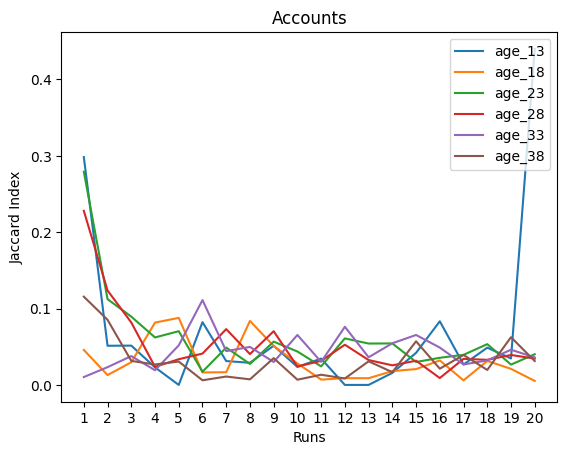

In [13]:
plt.style.use('default')

#fig, ax = plt.subplots(author)
ax1 = author.plot()
ax1.set_xlabel('Runs')
ax1.set_xticks(range(1, 21))
ax1.set_ylabel('Jaccard Index')
ax1.set_title('Accounts')
ax1.legend(loc='upper right')
ax1.tight_layout()
#ax.plot(author)

NameError: name 'fig' is not defined

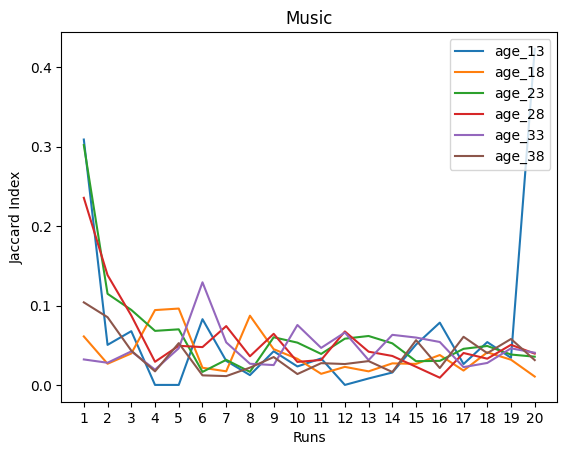

In [14]:
plt.style.use('default')

#fig, ax = plt.subplots(author)
ax2 = music.plot()
ax2.set_xlabel('Runs')
ax2.set_xticks(range(1, 21))
ax2.set_ylabel('Jaccard Index')
ax2.set_title('Music')
ax2.legend(loc='upper right')
fig.tight_layout()
#ax.plot(author)

NameError: name 'fig' is not defined

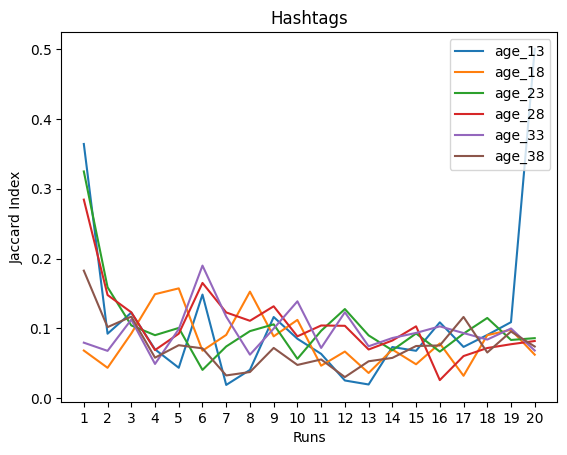

In [15]:
plt.style.use('default')

#fig, ax = plt.subplots(author)
ax3 = hashtag.plot()
ax3.set_xlabel('Runs')
ax3.set_xticks(range(1, 21))
ax3.set_ylabel('Jaccard Index')
ax3.set_title('Hashtags')
ax3.legend(loc='upper right')
fig.tight_layout()
#ax.plot(author)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


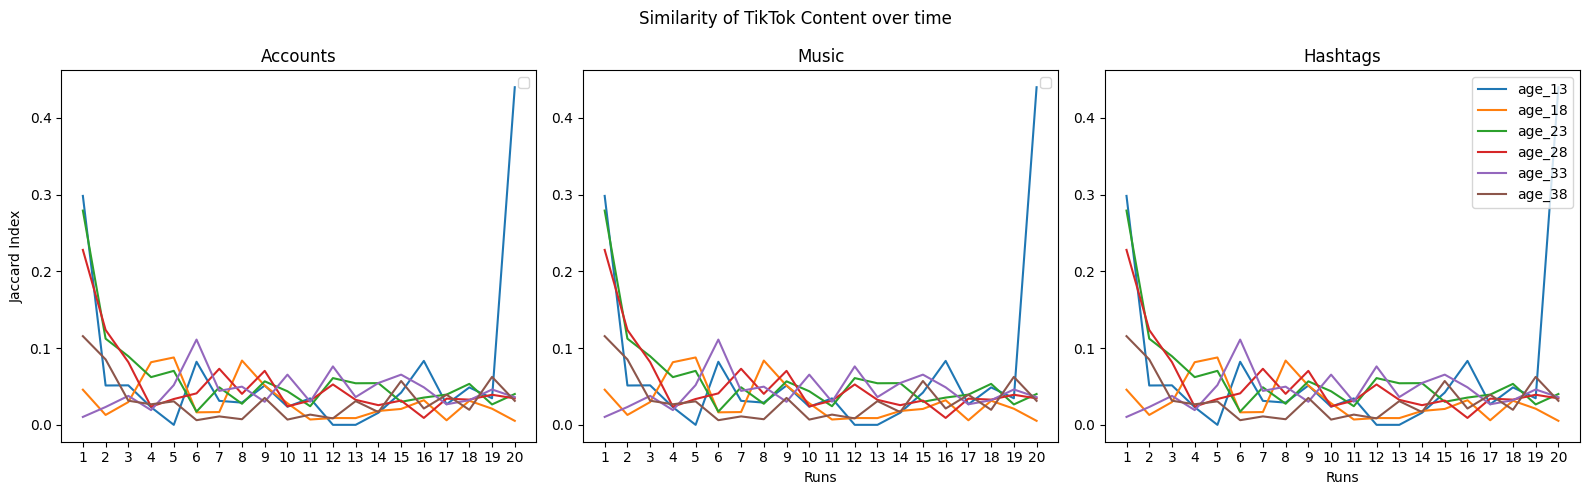

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle("Similarity of TikTok Content over time")

# Add the existing subplots to the figure using add_axes
# ax1 = fig.add_axes()
# ax2 = fig.add_axes()
# ax3 = fig.add_axes()

ax1.plot(author.index, author['age_13'])
ax1.plot(author.index, author['age_18'])
ax1.plot(author.index, author['age_23'])
ax1.plot(author.index, author['age_28'])
ax1.plot(author.index, author['age_33'])
ax1.plot(author.index, author['age_38'])
ax1.legend(['age_13', 'age_18', 'age_23', 'age_28', 'age_33', 'age_38'], loc="upper right")
ax1.set_xticks(range(1, 21))
ax1.set_ylabel('Jaccard Index')
ax1.set_title('Accounts')
ax1.legend(loc='upper right')

ax2.plot(author.index, author['age_13'])
ax2.plot(author.index, author['age_18'])
ax2.plot(author.index, author['age_23'])
ax2.plot(author.index, author['age_28'])
ax2.plot(author.index, author['age_33'])
ax2.plot(author.index, author['age_38'])
ax2.legend(['age_13', 'age_18', 'age_23', 'age_28', 'age_33', 'age_38'], loc="upper right")
ax2.set_xlabel('Runs')
ax2.set_xticks(range(1, 21))
ax2.set_title('Music')
ax2.legend(loc='upper right')

ax3.plot(author.index, author['age_13'])
ax3.plot(author.index, author['age_18'])
ax3.plot(author.index, author['age_23'])
ax3.plot(author.index, author['age_28'])
ax3.plot(author.index, author['age_33'])
ax3.plot(author.index, author['age_38'])
ax3.legend(['age_13', 'age_18', 'age_23', 'age_28', 'age_33', 'age_38'], loc="upper right")
ax3.set_xlabel('Runs')
ax3.set_xticks(range(1, 21))
ax3.set_title('Hashtags')


fig.tight_layout()